In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
merge_df = pd.read_csv('./merged.csv')
merge_df.drop(columns=['Unnamed: 0'], inplace=True)
merge_df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,CREDIT_USE_MONTH,NOT_USED_MONTH,SCALED_SCORE,WINDOW
0,5008804,1,1,1,0,427500.0,4,1,0,4,...,1,1,0,0,17,2.0,15.0,1.0,5.800000,16
1,5008806,1,1,1,0,112500.0,4,4,1,1,...,1,0,0,0,16,2.0,14.0,16.0,5.500000,30
2,5008808,0,0,1,0,270000.0,0,4,3,1,...,1,0,1,1,14,1.0,2.0,3.0,5.000000,5
3,5008812,0,0,1,0,283500.0,1,1,2,1,...,1,0,0,0,17,1.0,14.0,3.0,5.000000,17
4,5008815,1,1,1,0,270000.0,4,1,1,1,...,1,1,1,1,0,2.0,6.0,0.0,5.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8871,5148694,0,0,0,0,180000.0,1,4,0,2,...,1,0,0,0,8,2.0,21.0,0.0,4.809524,21
8872,5149055,0,0,1,0,112500.0,0,4,1,1,...,1,1,1,0,17,2.0,20.0,0.0,5.000000,20
8873,5149729,1,1,1,0,90000.0,4,4,1,1,...,1,0,0,0,17,2.0,17.0,5.0,4.882353,22
8874,5149838,0,0,1,0,157500.0,1,1,1,1,...,1,0,1,1,11,2.0,33.0,0.0,3.818182,33


In [3]:
from sklearn.model_selection import train_test_split

X = merge_df.drop(columns=['ID', 'CREDIT_USE_MONTH', 'NOT_USED_MONTH', 'SCALED_SCORE', 'WINDOW'], axis=1)
y = merge_df['SCALED_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

y_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

0.4131406377351059

In [5]:
y_pred

array([5.34518452, 5.33997153, 5.32220349, ..., 5.32438566, 5.3333781 ,
       5.31290819])

In [6]:
y_test

283     5.892857
2818    5.000000
1290    4.950000
4780    6.000000
807     5.250000
          ...   
3667    5.666667
8828    4.181818
6619    5.877193
6358    5.936170
7754    5.000000
Name: SCALED_SCORE, Length: 1776, dtype: float64

In [7]:
import set_matplotlib_hangul

Hangul OK in Windows!!!


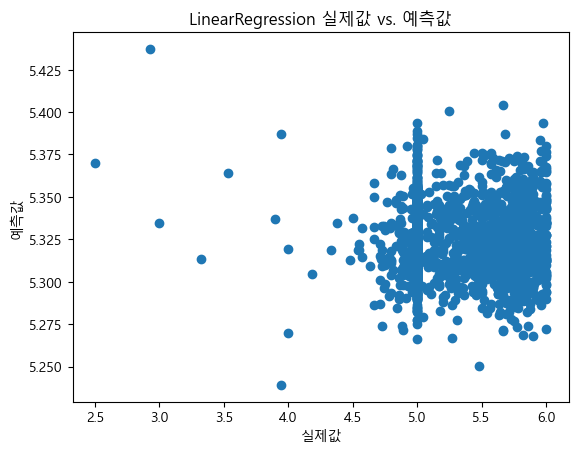

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('LinearRegression 실제값 vs. 예측값')
plt.show()

In [9]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.6235690996357282

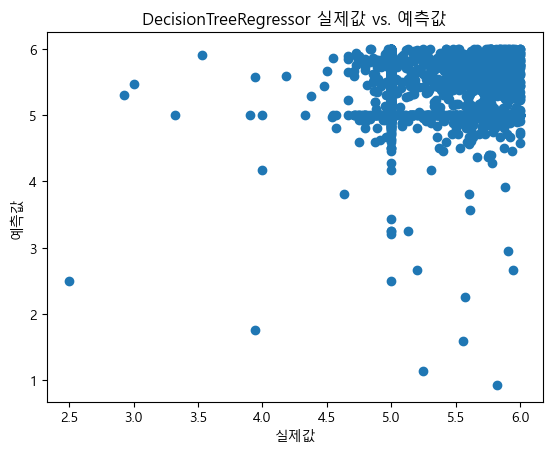

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('DecisionTreeRegressor 실제값 vs. 예측값')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 5, 10, 20]
}

grid_search = GridSearchCV(estimator=dt, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20]})

In [20]:
print(grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

DecisionTreeRegressor(max_depth=2)
최적의 하이퍼파라미터: {'max_depth': 2}
최고의 교차 검증 점수: -0.009494637497187508


In [21]:
y_pred = grid_search.best_estimator_.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.41656535701967506

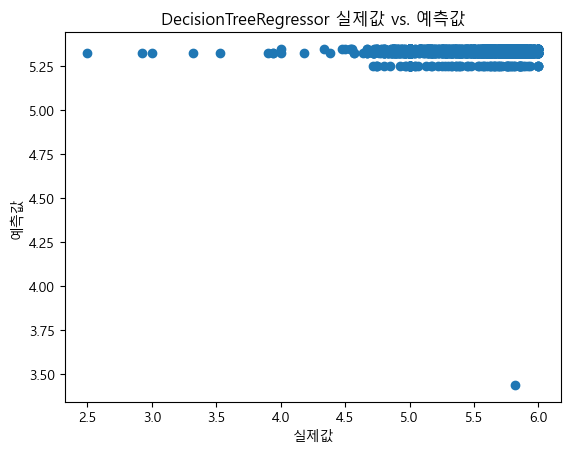

In [22]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('DecisionTreeRegressor 실제값 vs. 예측값')
plt.show()

### RandomForest Regerssor

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.43191578404135655

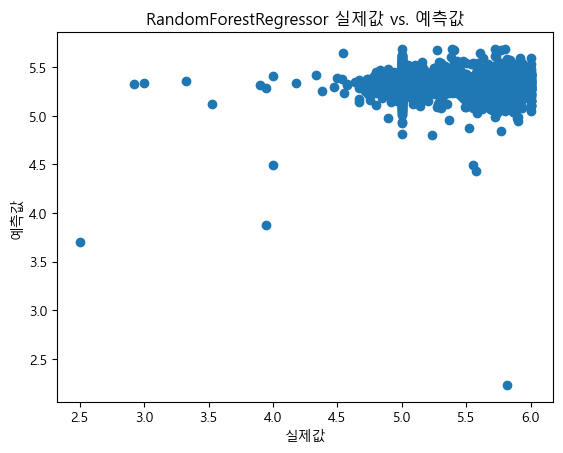

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('RandomForestRegressor 실제값 vs. 예측값')
plt.show()

In [34]:
params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 5, 10, 20]
}

grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'n_estimators': [50, 100, 150]})

In [35]:
print(grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

RandomForestRegressor(max_depth=2, n_estimators=150)
최적의 하이퍼파라미터: {'max_depth': 2, 'n_estimators': 150}
최고의 교차 검증 점수: -0.001803720819580068


In [36]:
y_pred = grid_search.best_estimator_.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

0.41415304510322887

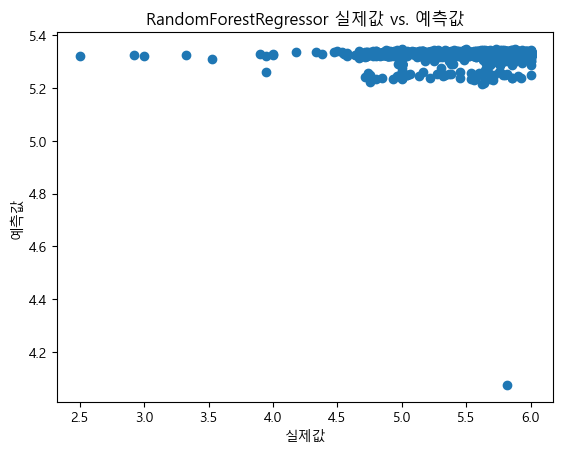

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('RandomForestRegressor 실제값 vs. 예측값')
plt.show()

### GradientBoostingRegressor

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_rmse

0.42266777797740357

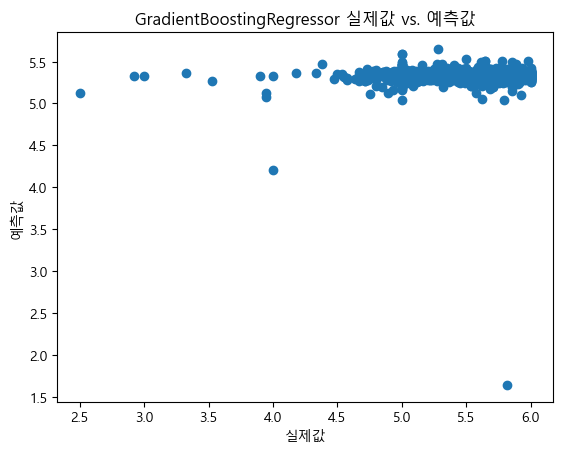

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('GradientBoostingRegressor 실제값 vs. 예측값')
plt.show()

In [38]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 3, 5, 7]
}

grid_search = GridSearchCV(estimator=gb, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [39]:
print(grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=50)
최적의 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
최고의 교차 검증 점수: 0.0012385542007778306


In [40]:
y_pred = grid_search.best_estimator_.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_rmse

0.4159861738717822

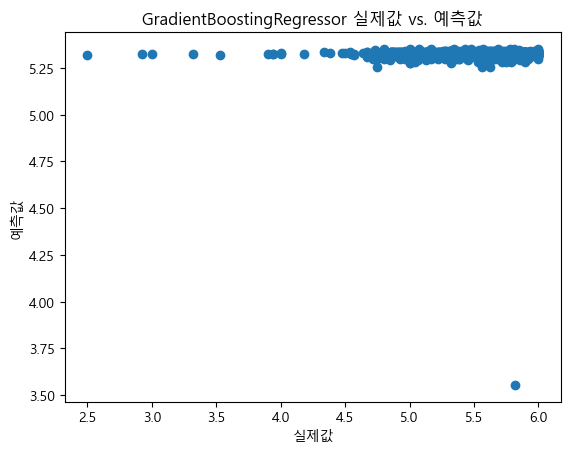

In [41]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('GradientBoostingRegressor 실제값 vs. 예측값')
plt.show()

### XGBRegressor

In [32]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.45556163814275463

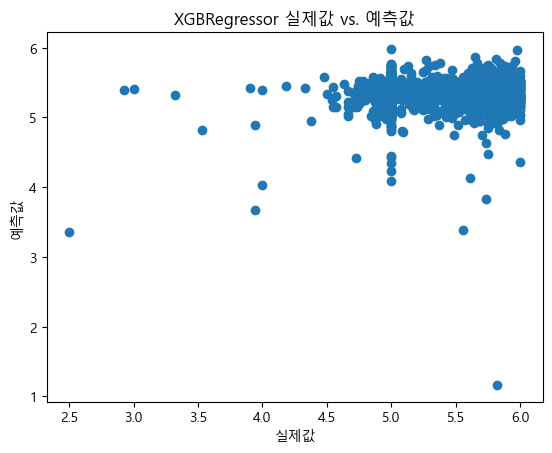

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('XGBRegressor 실제값 vs. 예측값')
plt.show()

In [42]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [43]:
print(grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
최적의 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
최고의 교차 검증 점수: -0.0005001128553865586


In [44]:
y_pred = grid_search.best_estimator_.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)
xgb_rmse

0.4145417710672828

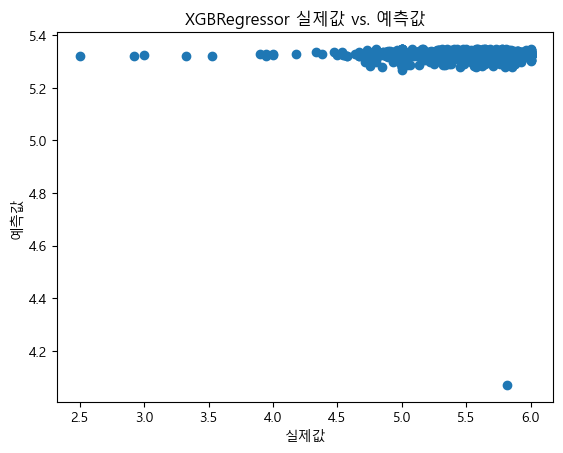

In [45]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('XGBRegressor 실제값 vs. 예측값')
plt.show()

### LGBMRegressor

In [17]:
from lightgbm import LGBMRegressor

lgbm = GradientBoostingRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

0.42264824176424437

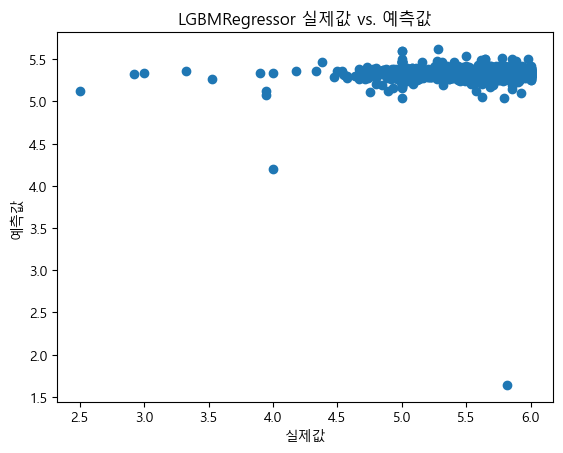

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('LGBMRegressor 실제값 vs. 예측값')
plt.show()

In [47]:
params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [48]:
print(grid_search.best_estimator_)
print("최적의 하이퍼파라미터:", grid_search.best_params_)
print("최고의 교차 검증 점수:", grid_search.best_score_)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=50)
최적의 하이퍼파라미터: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
최고의 교차 검증 점수: 0.0008275945624205416


In [49]:
y_pred = grid_search.best_estimator_.predict(X_test)
lgbm_mse = mean_squared_error(y_test, y_pred)
lgbm_rmse = np.sqrt(lgbm_mse)
lgbm_rmse

0.4159861738717822

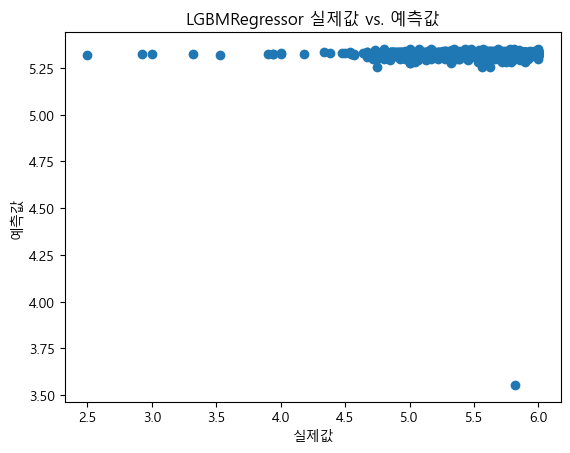

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('LGBMRegressor 실제값 vs. 예측값')
plt.show()